# Using AlexNet to get Encoded Vectors for Image Retrieval

In [15]:
# Python > 3, TensorFlow > 1.0
import random
import tensorflow as tf
import numpy as np
import os
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

# Import graph as before

In [16]:
graph = tf.Graph()
with graph.as_default():
    importer = tf.train.import_meta_graph('saved_models/alex_vars.meta')

sess = tf.Session(graph=graph)
importer.restore(sess, 'saved_models/alex_vars')

INFO:tensorflow:Restoring parameters from saved_models/alex_vars


# We still want handle to `fc7`, but we won't attach anything else

In [17]:
# Get outputs from second-to-last layer in pre-built model
fc7_op = graph.get_operation_by_name('fc7/relu')
fc7 = fc7_op.outputs[0]
x = graph.get_operation_by_name('input').outputs[0]
init = graph.get_operation_by_name('init')

sess = tf.Session(graph=graph)
sess.run(init)

In [18]:
print(fc7.get_shape()[1])

4096


# Get data, as before

In [19]:
cat_files = [
    'data/dogs_and_cats/cats/' + f
    for 
    f
    in
    os.listdir('data/dogs_and_cats/cats')
]

dog_files = [
    'data/dogs_and_cats/dogs/' + f
    for 
    f
    in
    os.listdir('data/dogs_and_cats/dogs')
]

all_files = cat_files + dog_files

In [20]:
random.shuffle(all_files)

# Decide how many examples want for our nearest neighbors model

In [21]:
num_images = 5000
neighbor_list = all_files[:num_images]

## Create empty NumPy array to fill with encoded vectors

In [22]:
extracted_features = np.ndarray((num_images, fc7.get_shape()[1]))

## Fill said NumPy array

In [23]:
for i, filename in enumerate(neighbor_list):
    image = ndimage.imread(filename)
    features = sess.run(fc7, feed_dict={x: [image]})
    extracted_features[i:i+1] = features
    if i % 250 == 0:
        print(i)

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750


In [24]:
len(extracted_features)

5000

# Create Nearest Neighbors model!

In [25]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(extracted_features)

In [26]:
distances, indices = nbrs.kneighbors(extracted_features)

In [27]:
indices

array([[   0, 4823,  646,  911, 3253],
       [   1, 3018, 4476,  581, 3030],
       [   2,  921, 1562, 1712, 1208],
       ..., 
       [4997,  961, 4855, 3747,  214],
       [4998, 2695, 4612,  401, 4165],
       [4999, 4199, 2558, 2077, 2309]])

# Print out the five nearest neighbors

In [28]:
def show_neighbors(idx, indices, filenames):
    neighbors = indices[idx]
    for i, neighbor in enumerate(neighbors):
        image = ndimage.imread(filenames[neighbor])
        plt.figure(i)
        plt.imshow(image)
    plt.show()

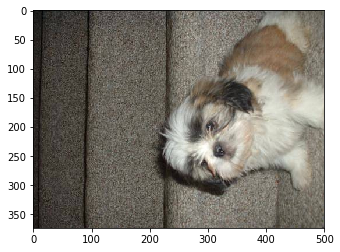

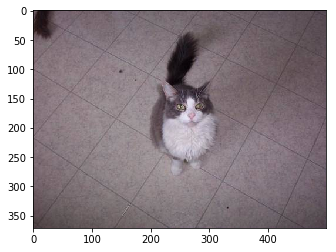

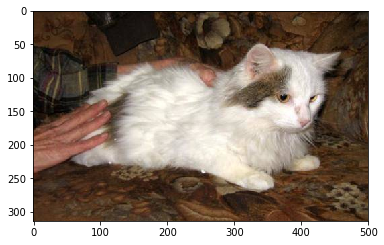

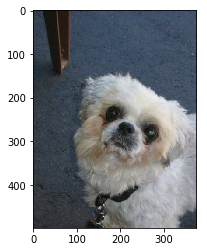

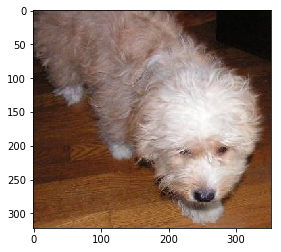

In [29]:
show_neighbors(random.randint(0, len(extracted_features)), indices, neighbor_list)